In [1]:
#built in magic function for displaying the plots in lines
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [3]:
# Read the City and Ride Data
city_data_csv = pd.read_csv(city_data_to_load)
ride_data_csv = pd.read_csv(ride_data_to_load)

In [4]:
# Combine the data into a single dataset
merged_pyber_df = pd.merge(ride_data_csv, city_data_csv, on= "city", how= "left")
#Show data in first 5 rows for preview
merged_pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

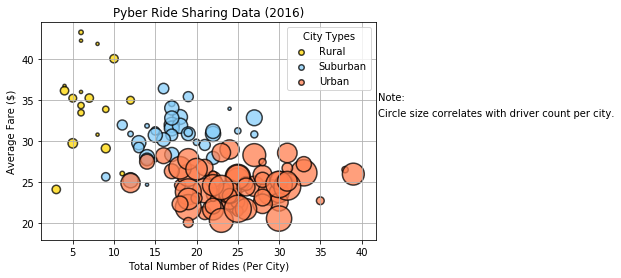

In [5]:
#create dataframes and groupby for city types
#Rural Dataframe
rural_city_df = merged_pyber_df[merged_pyber_df["type"] == "Rural"].groupby([merged_pyber_df["city"]])

#Suburban Dataframe
suburban_city_df = merged_pyber_df[merged_pyber_df["type"] == "Suburban"].groupby([merged_pyber_df["city"]])

#Urban Dataframe
urban_city_df = merged_pyber_df[merged_pyber_df["type"] == "Urban"].groupby([merged_pyber_df["city"]])

#City type calculations for ride count (X values) 
x_rural_ride_count = rural_city_df["ride_id"].count()
x_suburban_ride_count = suburban_city_df["ride_id"].count()
x_urban_ride_count = urban_city_df["ride_id"].count()

#City type calculations for average fare (Y values) 
y_rural_avg_fare = rural_city_df["fare"].mean()
y_suburban_avg_fare = suburban_city_df["fare"].mean()
y_urban_avg_fare = urban_city_df["fare"].mean()

#City type calculations for driver count average (S value)
rural_avg_driver_count = rural_city_df["driver_count"].mean()
suburban_avg_driver_count = suburban_city_df["driver_count"].mean()
urban_avg_driver_count = urban_city_df["driver_count"].mean()

# Scatter plots for city types: Rural, Suburban, Urban
#Rural Scatter Plot
plt.scatter(x_rural_ride_count, y_rural_avg_fare, label = "Rural", s=rural_avg_driver_count * 10, 
            facecolors=["gold"], edgecolors="black", marker="o", alpha = 0.75, linewidth = 1.5)

#Suburban Scatter Plot
plt.scatter(x_suburban_ride_count, y_suburban_avg_fare, label = "Suburban", s=suburban_avg_driver_count  * 10,
            facecolors=["lightskyblue"], edgecolors="black", marker="o", alpha = 0.75, linewidth = 1.5)

#Urban Scatter Plot
plt.scatter(x_urban_ride_count, y_urban_avg_fare, label = "Urban", s=urban_avg_driver_count * 10, 
            facecolors=["coral"], edgecolors="black", 
            alpha = 0.75, marker="o", linewidth = 1.5)
plt.grid()

#Add x axis label, y axis label, and title
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

#Create Legend
legend = plt.legend(fontsize = 10, title= "City Types", loc="best") 
                                      
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note:", fontsize = 10)
plt.text(42,33,"Circle size correlates with driver count per city.", fontsize = 10)     

# Save figure 
plt.savefig("Images/Pyber_Ride_SharingData(2016).png")

#Show Figure
plt.show()

## Total Fares by City Type

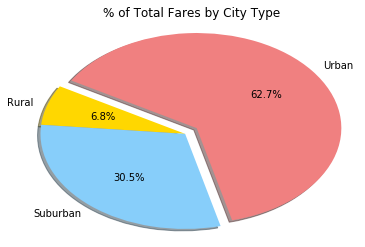

In [6]:
# Calculate Fare percents by city type: Rural, Suburban, and Urban 

fares_city_type_grouped = merged_pyber_df.groupby(['type'])
total_fare_city_type = fares_city_type_grouped['fare'].sum()

# Create Pie Chart

plt.title("% of Total Fares by City Type")
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_fare_city_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow=True, startangle=150)

# Save Figure
plt.savefig("Images/Total_Fares_by_City_Type.png")

# Show Figure
plt.axis("auto")
plt.show()

## Total Rides by City Type

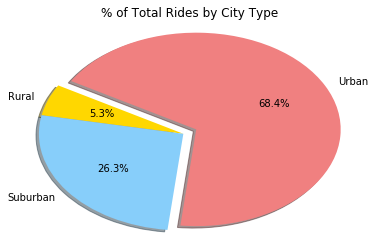

In [7]:
# Calculate Ride percents for city types: Rural, Suburban, and Urban

total_rides_city_type = fares_city_type_grouped['ride_id'].count()

# Build Pie Chart

plt.title("% of Total Rides by City Type")
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_rides_city_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow=True, startangle=150)

# Save Figure
plt.axis("auto")
plt.savefig("Images/Total_Rides_by_City_Type.png")

## Total Drivers by City Type

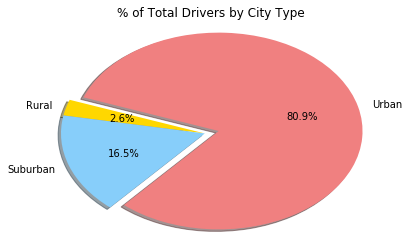

In [8]:
#Calculate Driver percents by city type: Rural, Suburban, and Urban

fares_city_type_grouped = city_data_csv.groupby(['type'])
total_drivers_city_type = fares_city_type_grouped['driver_count'].sum()

# Build Pie Chart
plt.title("% of Total Drivers by City Type")
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_drivers_city_type, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%",
        shadow=True, startangle=160)

# Save Figure
plt.savefig("Images/Total_Drivers_by_City_Type.png")

# Show Figure
plt.axis("auto")
plt.show()